# Práctica Machine Learning 101

## Predicción los precios Airbnb 

La finalidad de este notebook es predecir de manera satisfactoria el precio de los apartamentos ubicados en Madrid que se encuentran en Airbnb.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## 1. Carga del fichero airbnb y división train, test.

In [2]:
airbnb = pd.read_csv('./data/airbnb-listings-extract.csv',sep=';', decimal='.')

Pasamos a dividir en train y test.

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos los ficheros para poder trabajar con ellos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


A partir de ahora pasaremos a usar solamente el dataset de Train.

In [4]:
train = pd.read_csv('./train.csv', sep=';', decimal='.')

In [5]:
test = pd.read_csv('./test.csv', sep=';', decimal='.')

## 2. Análisis exploratorio

In [6]:
train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [7]:
train.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [8]:
train.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [9]:
train['Price'].value_counts()

50.0     524
60.0     445
30.0     443
25.0     429
35.0     384
        ... 
456.0      1
454.0      1
184.0      1
907.0      1
131.0      1
Name: Price, Length: 345, dtype: int64

In [10]:
train.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Hacemos una primera limpieza de variables que no queremos para nuestro modelo y nos quedamos con 20.

In [11]:
cols = ['Neighbourhood Cleansed','Neighbourhood','City',
        'Property Type','Accommodates','Bathrooms', 'Bedrooms', 'Beds','Square Feet','Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People','Minimum Nights', 'Maximum Nights','Number of Reviews','Review Scores Rating', 'Cancellation Policy', 'Reviews per Month' ]

train = train[cols]

In [12]:
train.head()

,Neighbourhood Cleansed,Neighbourhood,City,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month
0,Jerónimos,Jerónimos,Madrid,Apartment,4,1.0,1.0,2.0,NaN,60.0,NaN,25.0,1,0,2,1125,12,95.0,moderate,0.50
1,Sol,NaN,Madrid,Apartment,4,1.0,1.0,2.0,NaN,50.0,NaN,15.0,1,0,1,1125,20,91.0,flexible,2.43
2,Vista Alegre,Carabanchel,Madrid,Apartment,1,1.5,1.0,8.0,NaN,10.0,NaN,5.0,1,0,3,30,0,NaN,moderate,NaN
3,Embajadores,NaN,Madrid,Apartment,2,3.0,1.0,1.0,NaN,30.0,NaN,NaN,1,0,10,1125,0,NaN,strict,NaN
4,Gaztambide,Gaztambide,Madrid,Apartment,2,1.0,1.0,1.0,NaN,32.0,NaN,NaN,1,10,1,1125,97,92.0,strict,2.08


In [13]:
train.shape

(11824, 20)

Hacemos un primer filtrado en City ya que queremos quedarnos solamente con los valores pertenecientes a Madrid.

In [14]:
Madrid = train['City'] == 'Madrid'
train = train[Madrid]
train.groupby(['City']).size()

City
Madrid    10567
dtype: int64

Creamos una nueva variable.

In [15]:
train['Bedrooms_per_accommodate'] = train['Bedrooms']/train['Accommodates']

Volvemos a hacer el describe para ver qué valores tenemos que imputar.

In [16]:
train.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Reviews per Month,Bedrooms_per_accommodate
count,10567.000000,10527.000000,10549.000000,10530.000000,413.000000,10559.00000,4549.000000,6282.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,8281.000000,8388.000000,10549.000000
mean,3.188228,1.256863,1.294909,1.992688,375.266344,66.18515,183.864586,30.025310,1.569225,7.422920,3.091984,976.684016,23.163055,91.584833,1.927200,0.485408
std,1.989624,0.608184,0.833250,1.529786,556.981908,56.16416,110.595924,27.097579,1.072125,10.616849,14.131654,9928.723799,38.364933,9.111923,1.891259,0.323166
min,1.000000,0.000000,0.000000,1.000000,0.000000,9.00000,70.000000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,0.020000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,31.00000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,1.000000,88.000000,0.480000,0.333333
50%,2.000000,1.000000,1.000000,1.000000,97.000000,53.00000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,7.000000,94.000000,1.270000,0.500000
75%,4.000000,1.000000,2.000000,2.000000,646.000000,80.00000,200.000000,35.000000,2.000000,14.000000,3.000000,1125.000000,28.000000,98.000000,2.880000,0.500000
max,16.000000,8.000000,10.000000,16.000000,5167.000000,875.00000,990.000000,500.000000,16.000000,276.000000,1125.000000,1000000.000000,356.000000,100.000000,17.210000,10.000000


Antes, vemos el porcentaje de NAs para ver si merece la pena imputar o no. Si lo hacemos y el porcentaje de datos es mínimo, lo unico que conseguiremos es tener mucho ruido.
Vemos que en los Square Feet tenemos muchísimos nulos, por lo tanto la eliminamos, para el resto, imputaremos valores con la media.

In [17]:
print(train.isnull().sum())

Neighbourhood Cleansed          0
Neighbourhood                3527
City                            0
Property Type                   0
Accommodates                    0
Bathrooms                      40
Bedrooms                       18
Beds                           37
Square Feet                 10154
Price                           8
Security Deposit             6018
Cleaning Fee                 4285
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Number of Reviews               0
Review Scores Rating         2286
Cancellation Policy             0
Reviews per Month            2179
Bedrooms_per_accommodate       18
dtype: int64


In [18]:
train = train.drop(['Square Feet'], axis=1)

También borramos la variable City ya que solo tiene un valor: Madrid

In [19]:
train = train.drop(['City'], axis=1)

Procedemos a imputar valores de las variables: Bathrooms, Bedrooms, Beds, Price, Security Deposit, Cleaning Fee, Review Scores Rating, Reviews per Month.


In [20]:
train.dtypes

Neighbourhood Cleansed       object
Neighbourhood                object
Property Type                object
Accommodates                  int64
Bathrooms                   float64
Bedrooms                    float64
Beds                        float64
Price                       float64
Security Deposit            float64
Cleaning Fee                float64
Guests Included               int64
Extra People                  int64
Minimum Nights                int64
Maximum Nights                int64
Number of Reviews             int64
Review Scores Rating        float64
Cancellation Policy          object
Reviews per Month           float64
Bedrooms_per_accommodate    float64
dtype: object

In [21]:
train.mean()

Accommodates                  3.188228
Bathrooms                     1.256863
Bedrooms                      1.294909
Beds                          1.992688
Price                        66.185150
Security Deposit            183.864586
Cleaning Fee                 30.025310
Guests Included               1.569225
Extra People                  7.422920
Minimum Nights                3.091984
Maximum Nights              976.684016
Number of Reviews            23.163055
Review Scores Rating         91.584833
Reviews per Month             1.927200
Bedrooms_per_accommodate      0.485408
dtype: float64

In [22]:
mediabedrooms = train['Bedrooms'].mean()
mediabathrooms = train['Bathrooms'].mean()
mediabeds  = train['Beds'].mean()
mediareviewscores = train['Review Scores Rating'].mean()
mediareviewsmoth = train['Reviews per Month'].mean()
mediabedroomsaccom = train['Bedrooms_per_accommodate'].mean()
mediaprice = train['Price'].mean()

In [23]:
train["Bedrooms"] = train['Bedrooms'].fillna(mediabedrooms)
train["Bathrooms"] = train['Bathrooms'].fillna(mediabathrooms)
train["Beds"]  = train['Beds'].fillna(mediabeds)
train["Review Scores Rating"] = train['Review Scores Rating'].fillna(mediareviewscores)
train["Reviews per Month"] = train['Reviews per Month'].fillna(mediareviewsmoth)
train['Bedrooms_per_accommodate'] = train['Bedrooms_per_accommodate'].fillna(mediabedroomsaccom)
train["Price"] = train['Price'].fillna(mediaprice)

Los valores NAN de Neighbourhood los meteremos en una categoría nueva 'Unknown'

In [24]:
train['Neighbourhood'] = train['Neighbourhood'].fillna('Unknown')

En el caso de Security Deposit y Cleaning Fee, entendemos que los valores NaN equivalen a 0.

In [25]:
train["Security Deposit"] = train['Security Deposit'].fillna(0)
train["Cleaning Fee"] = train['Cleaning Fee'].fillna(0)

In [26]:
print(train.isnull().sum())

Neighbourhood Cleansed      0
Neighbourhood               0
Property Type               0
Accommodates                0
Bathrooms                   0
Bedrooms                    0
Beds                        0
Price                       0
Security Deposit            0
Cleaning Fee                0
Guests Included             0
Extra People                0
Minimum Nights              0
Maximum Nights              0
Number of Reviews           0
Review Scores Rating        0
Cancellation Policy         0
Reviews per Month           0
Bedrooms_per_accommodate    0
dtype: int64


Pasamos a dummy las variables categóricas utilizando el mean encoder para la mayoría y el label encoder en Cancellation Policy debido a las escasas combinaciones que tiene.

In [27]:
categorical = ['Neighbourhood', 'Neighbourhood Cleansed', 'Property Type']

mean_map = {}
for c in categorical:
    mean = train.groupby(c)['Price'].mean()
    train[c] = train[c].map(mean)    
    mean_map[c] = mean

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Cancellation Policy'] = labelencoder.fit_transform(train['Cancellation Policy'])

In [29]:
print(train.isnull().sum())

Neighbourhood Cleansed      0
Neighbourhood               0
Property Type               0
Accommodates                0
Bathrooms                   0
Bedrooms                    0
Beds                        0
Price                       0
Security Deposit            0
Cleaning Fee                0
Guests Included             0
Extra People                0
Minimum Nights              0
Maximum Nights              0
Number of Reviews           0
Review Scores Rating        0
Cancellation Policy         0
Reviews per Month           0
Bedrooms_per_accommodate    0
dtype: int64


In [30]:
train

,Neighbourhood Cleansed,Neighbourhood,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month,Bedrooms_per_accommodate
0,104.600000,112.162791,67.743957,4,1.0,1.0,2.0,60.0,0.0,25.0,1,0,2,1125,12,95.000000,1,0.5000,0.250000
1,85.822309,59.850119,67.743957,4,1.0,1.0,2.0,50.0,0.0,15.0,1,0,1,1125,20,91.000000,0,2.4300,0.250000
2,37.074074,39.898089,67.743957,1,1.5,1.0,8.0,10.0,0.0,5.0,1,0,3,30,0,91.584833,1,1.9272,1.000000
3,60.709388,59.850119,67.743957,2,3.0,1.0,1.0,30.0,0.0,0.0,1,0,10,1125,0,91.584833,2,1.9272,0.500000
4,56.000000,56.986301,67.743957,2,1.0,1.0,1.0,32.0,0.0,0.0,1,10,1,1125,97,92.000000,2,2.0800,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,65.102709,59.967332,67.743957,3,1.0,2.0,2.0,52.0,0.0,16.0,1,0,3,1125,0,91.584833,1,1.9272,0.666667
11820,29.114286,34.824176,67.743957,6,1.0,3.0,3.0,55.0,200.0,30.0,5,20,1,1125,68,89.000000,2,2.9200,0.500000
11821,77.316536,59.850119,67.743957,2,1.0,1.0,1.0,69.0,0.0,30.0,2,40,1,1125,24,94.000000,2,2.0600,0.500000
11822,77.316536,71.183644,67.743957,2,1.0,1.0,1.0,69.0,0.0,25.0,1,0,2,15,19,98.000000,2,3.3900,0.500000


Ahora echamos un vistazo a las variables

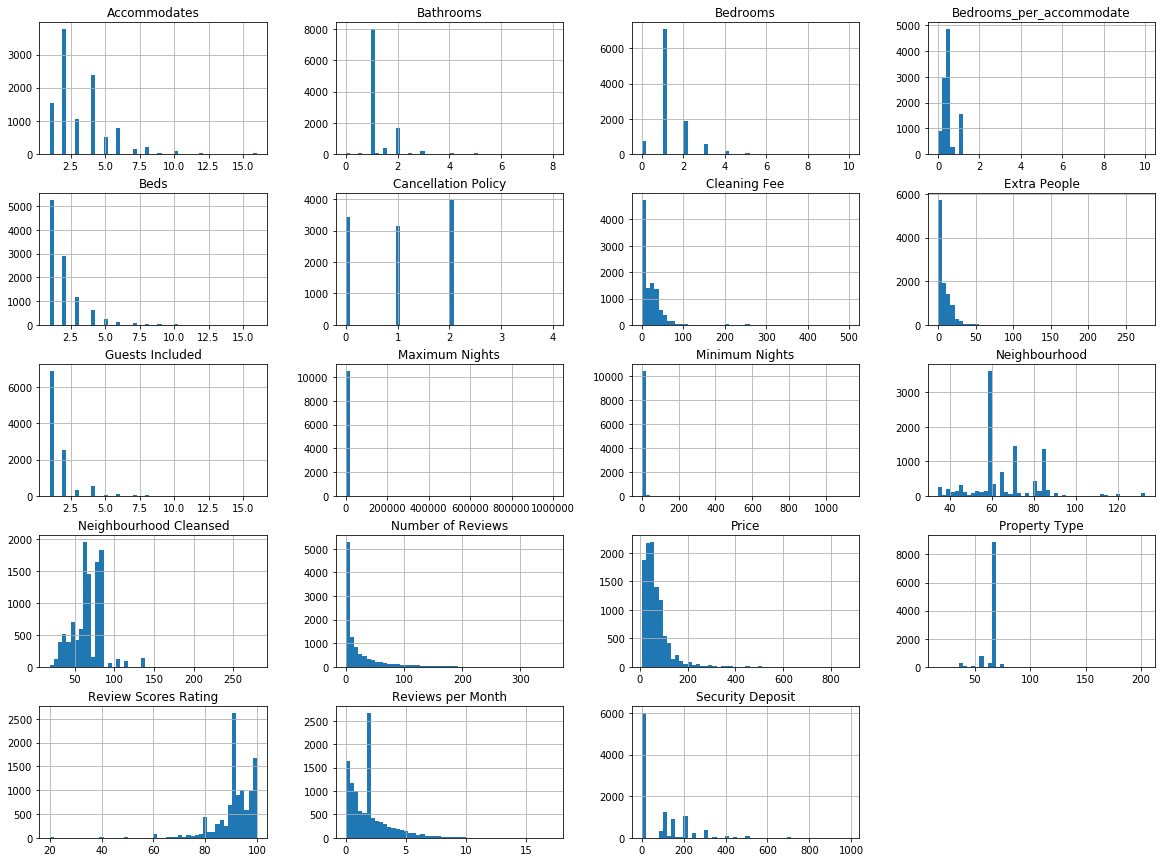

In [31]:
train.hist(bins =50, figsize=(20,15))
plt.show()

Miramos los ouliers. Empezamos con Accommodates.

Text(0.5, 0, 'Accommodates')

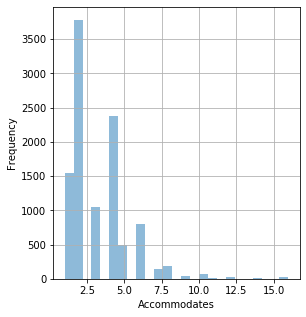

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,2)
train['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

In [33]:
my_filter = train['Accommodates'] > 8
train_filtered = train[my_filter]

Text(0.5, 0, 'Accommodates')

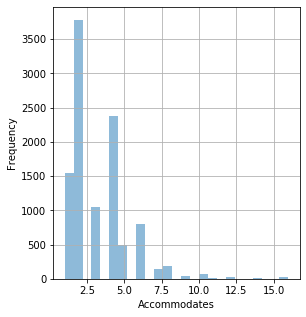

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,2)
train['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

In [35]:
my_filter = train['Accommodates'] < 8
train = train[my_filter]

Miramos también los outliers de Security Deposit.

Text(0.5, 0, 'Security Deposit')

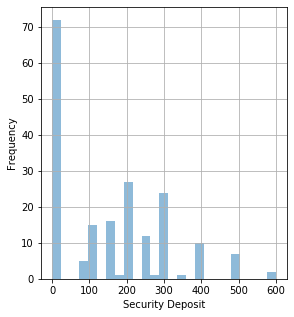

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,2)
train_filtered['Security Deposit'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Security Deposit')

In [37]:
my_filter = train['Security Deposit'] >400
train_filtered = train[my_filter]

Text(0.5, 0, 'Security Deposit')

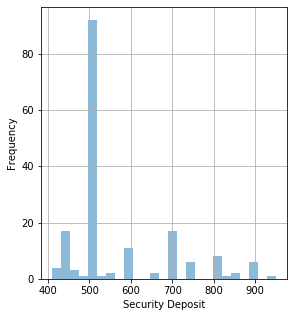

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,2)
train_filtered['Security Deposit'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Security Deposit')

In [39]:
my_filter = train['Security Deposit'] < 400
train = train[my_filter]

Hacemos la transformación logarítmica para tener una distribución gaussiana y ver mejor lo datos. También nos hará tener mejores prestaciones a la hora de ejecutar el modelo.

In [40]:
features_to_transform = ['Guests Included','Maximum Nights','Minimum Nights', 'Price']

for feature in features_to_transform:
    train[feature] = train[feature].apply(lambda x: np.log10(x))

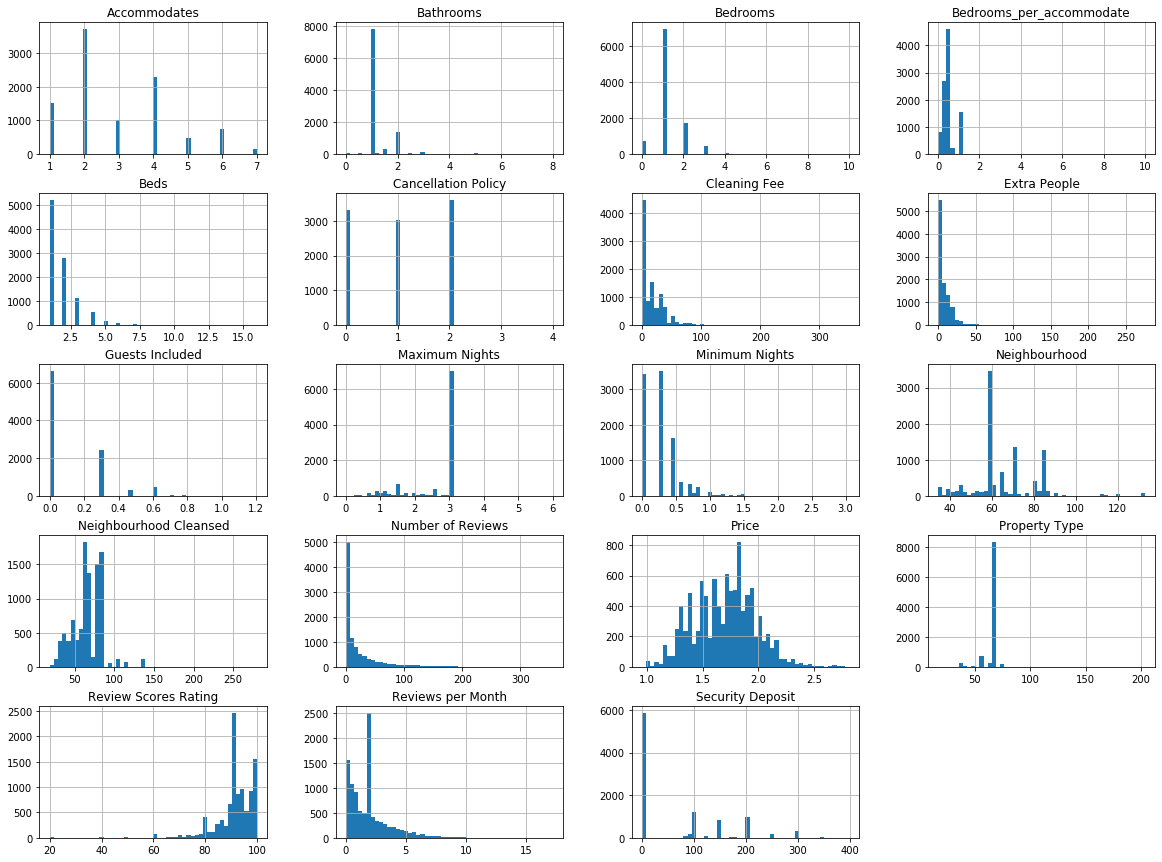

In [41]:
train.hist(bins =50, figsize=(20,15))
plt.show()

# 3. Relación entre variables

Miramos la correlacion entre variables.

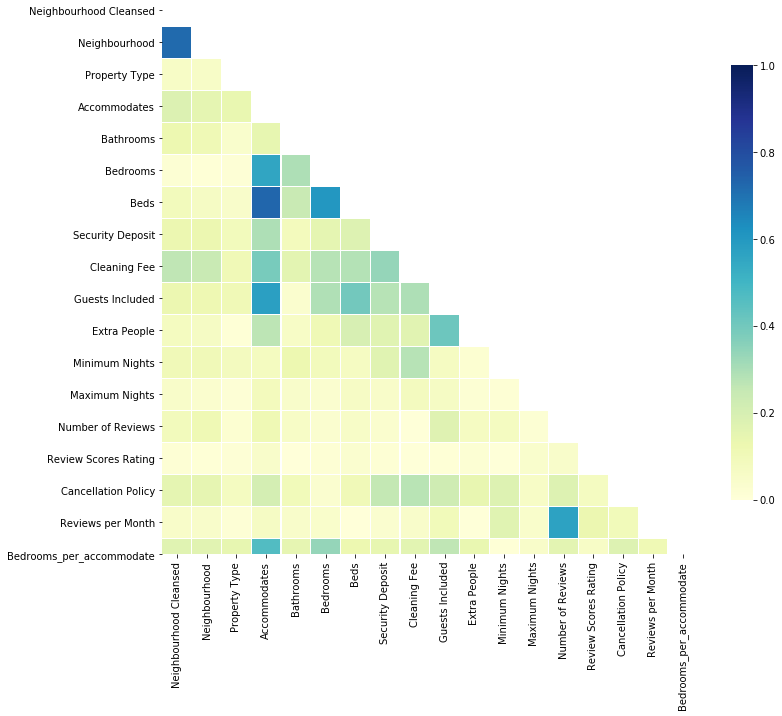

In [42]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [43]:
corr_matrix = train.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                       1.000000
Accommodates                0.648321
Cleaning Fee                0.474589
Beds                        0.440508
Neighbourhood Cleansed      0.422572
Guests Included             0.403539
Bedrooms                    0.379196
Neighbourhood               0.341077
Security Deposit            0.311068
Cancellation Policy         0.152580
Property Type               0.150263
Minimum Nights              0.149811
Extra People                0.130722
Bathrooms                   0.116927
Maximum Nights              0.086116
Review Scores Rating        0.050704
Number of Reviews           0.034591
Reviews per Month          -0.020833
Bedrooms_per_accommodate   -0.351634
Name: Price, dtype: float64

Vemos como las variables relacionadas con reviews y el máximo  de noches no influyen demasiado en el precio. Por otro lado, podemos quitar neighbourhood por estar muy correlada con Neighbourhood Cleansed, la cual tiene una correlación mayor con la variable objetivo.

In [44]:
train = train.drop(['Neighbourhood'], axis=1)

# 4. Aplicamos a test las transformaciones de train

In [45]:
#Seleccionamos la columnas a usar
cols = ['Neighbourhood Cleansed','Neighbourhood','City',
        'Property Type','Accommodates','Bathrooms', 'Bedrooms', 'Beds','Square Feet','Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People','Minimum Nights', 'Maximum Nights','Number of Reviews','Review Scores Rating', 'Cancellation Policy', 'Reviews per Month' ]

test = test[cols]

#Filtramos por Madrid
Madrid = test['City'] == 'Madrid'
test = test[Madrid]

#Creamos la nueva variable
test['Bedrooms_per_accommodate'] = test['Bedrooms']/test['Accommodates']

#Eliminamos las variables pies cuadrados y ciudad
test = test.drop(['Square Feet'], axis=1)
test = test.drop(['City'], axis=1)

#Imputamos con los valores de train
test["Bedrooms"] = test['Bedrooms'].fillna(mediabedrooms)
test["Bathrooms"] = test['Bathrooms'].fillna(mediabathrooms)
test["Beds"]  = test['Beds'].fillna(mediabeds)
test["Review Scores Rating"] = test['Review Scores Rating'].fillna(mediareviewscores)
test["Reviews per Month"] = test['Reviews per Month'].fillna(mediareviewsmoth)
test['Bedrooms_per_accommodate'] = test['Bedrooms_per_accommodate'].fillna(mediabedroomsaccom)
test["Security Deposit"] = test['Security Deposit'].fillna(0)
test["Cleaning Fee"] = test['Cleaning Fee'].fillna(0)
test["Price"] = test['Price'].fillna(mediaprice)
test['Neighbourhood'] = test['Neighbourhood'].fillna('Unknown')

#Pasamos a dummy
for c in categorical:
    test[c] = test[c].map(mean_map[c])

test['Cancellation Policy'] = labelencoder.fit_transform(test['Cancellation Policy'])

#Quitamos la columna Neighbourhood
test = test.drop(['Neighbourhood'], axis=1)

# #Filtramos los valores de price
my_filter = test['Accommodates'] < 8
test = test[my_filter]

my_filter = test['Security Deposit'] < 8
test = test[my_filter]

In [46]:
print(test.isnull().sum())

Neighbourhood Cleansed      0
Property Type               1
Accommodates                0
Bathrooms                   0
Bedrooms                    0
Beds                        0
Price                       0
Security Deposit            0
Cleaning Fee                0
Guests Included             0
Extra People                0
Minimum Nights              0
Maximum Nights              0
Number of Reviews           0
Review Scores Rating        0
Cancellation Policy         0
Reviews per Month           0
Bedrooms_per_accommodate    0
dtype: int64


In [47]:
test.groupby(['Property Type']).size()

Property Type
20.500000       2
38.593156      51
41.586207       7
47.923077       2
49.527778       5
57.428571       1
57.685451     142
63.385019      54
64.888889       4
66.680723      30
67.743957    1198
68.000000       1
74.895652      20
79.285714       2
dtype: int64

Como solo hay un valore de Property Type que no hemos visto en train, lo eliminamos.

In [48]:
test = test.dropna()

In [49]:
print(f'Dimensiones de train: {train.shape}')
print(f'Dimensiones de test: {test.shape}')

Dimensiones de train: (9947, 18)
Dimensiones de test: (1519, 18)


# 5.  Selección de características y modelo Random Forest

Hacemos selección de características con un Random forest.

In [50]:
features = ['Neighbourhood Cleansed',
        'Property Type','Accommodates','Bathrooms', 'Bedrooms', 'Beds','Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People','Minimum Nights', 'Maximum Nights','Number of Reviews','Review Scores Rating', 'Cancellation Policy', 'Reviews per Month', 'Bedrooms_per_accommodate']

target = ['Price']

x_train = train[features].values
y_train = train[target].values
x_test = test[features].values
y_test = test[target].values

En los random forest no nos hace falta escalar los datos.

best mean cross-validation score: 0.981
best parameters: {'max_depth': 14}


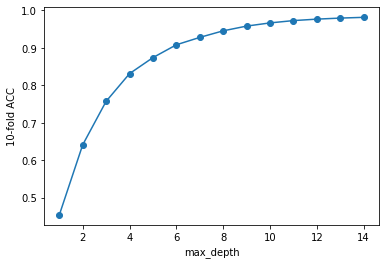

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(x_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

Evaluamos el modelo.

In [52]:
maxDepthOptimo = grid.best_params_['max_depth']
randomModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(x_train,y_train)

print("Train: ",randomModel.score(x_train,y_train))
print("Test: ",randomModel.score(x_test,y_test))

Train:  0.9950159782458653
Test:  -1.0910050670846174


Seleccionamos las variables que más influyen en el modelo para intentar optimizarlo.

In [53]:
from sklearn.model_selection import KFold

N,Nfeatures = x_train.shape

rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(x_train):
        
        Xt = x_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = x_train[idxVal,:]
        yv = y_train[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))


# features 1 error 9.322270251388432e-06 +/- 1.5349414266220298e-05
# features 2 error 0.00014179847213511288 +/- 0.00011085319502149681
# features 3 error 0.0014182568239469507 +/- 0.0014138464251266562
# features 4 error 0.0006539924420611021 +/- 0.00043131808686287766
# features 5 error 0.00232992738009411 +/- 0.0012311172851850137
# features 6 error 0.004472768122065263 +/- 0.0023212108588401897
# features 7 error 0.007526268910063227 +/- 0.003284238377680648
# features 8 error 0.01145702130732601 +/- 0.0037993113552225255
# features 9 error 0.005341944595562764 +/- 0.0025956080187294756
# features 10 error 0.007257408203676863 +/- 0.0024277672621858554
# features 11 error 0.009872353724174531 +/- 0.0030185203141346512
# features 12 error 0.013206385398141295 +/- 0.0034828522891190952
# features 13 error 0.015805513561215824 +/- 0.003698453576003925
# features 14 error 0.020154528975830345 +/- 0.0033054102218542276
# features 15 error 0.023386154848415275 +/- 0.0037715874850667744


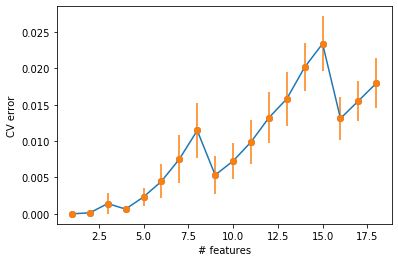

In [54]:
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

In [55]:
selected_features = indices[0:4]

maxDepthOptimo = grid.best_params_['max_depth']
randomModel = RandomForestRegressor(max_depth=maxDepthOptimo-8,n_estimators=200,max_features='sqrt').fit(x_train,y_train)

randomModel.fit(x_train[:, selected_features],y_train)

print("Train: ",randomModel.score(x_train[:, selected_features],y_train))
print("Test: ",randomModel.score(x_test[:, selected_features],y_test))

Train:  0.9886543761088067
Test:  -1.0855115424031472


Conseguimos que el error en test baje pero aun así parece que tenemos overfitting ya que, además de la diferencia entre el score de train y test, vemos que train se acerca mucho a 1, lo que significaría que el modelo se está aprendiendo los datos. Reducimos la profundidad para intentar ajustar más los valores.